# Use the Model in the Real World

- Use data of GF satallite
- Test if out trained model (trained on massachusetts-roads-dataset) can do the task

In [99]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torch
import numpy as np

import model

In [81]:
img_path = '/home/renyan/ossdata/gf-yunnan/IMG_0035.JPG'

In [82]:
img = cv2.imread(img_path)
img_part = img[0:1500,0:1500] * 4

In [83]:
transform = transforms.Compose([transforms.Resize([256, 256], 0), transforms.ToTensor(),])
img_part = transform(Image.fromarray(img))

In [84]:
img_part.shape

torch.Size([3, 256, 256])

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = model.LinkNet34().to(device)
net.load_state_dict(torch.load('checkpoints/v2_linknet34_epoch20.pth'))

<All keys matched successfully>

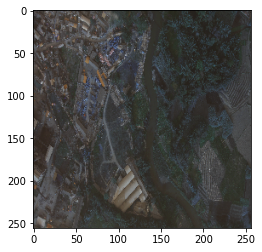

In [86]:
plt.imshow(img_part.permute(1, 2, 0))

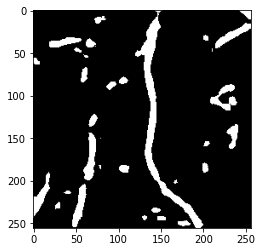

In [87]:
pred = net(img_part.unsqueeze(dim=0).to(device))
pred = (torch.sigmoid(pred).squeeze(0) > 0.51).type(torch.float32)
pred1 = torch.cat([pred]*3).permute(1, 2, 0)
plt.imshow(pred1.cpu())

In [88]:
net = model.DLinkNet34().to(device)
net.load_state_dict(torch.load('checkpoints/dlinknet34_lr_test_epoch2.pth'))

<All keys matched successfully>

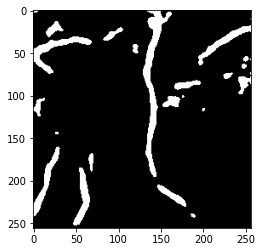

In [100]:
pred = net(img_part.unsqueeze(dim=0).to(device))
pred = (torch.sigmoid(pred).squeeze(0) > 0.51).type(torch.float32)
pred2 = torch.cat([pred]*3).permute(1, 2, 0)
plt.imshow(pred2.cpu())

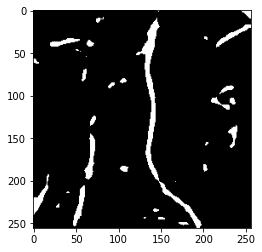

In [103]:
# pred1 = pred1.cpu().numpy()
kernel = np.ones((3,3), np.uint8)
erorsion_img = cv2.erode(pred1, kernel, iterations=1)
plt.imshow(erorsion_img)